## 1. import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris, fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## 2. Gaussian Naive Bayes

**Применение:** непрерывные признаки, которые предположительно имеют нормальное распределение.

**Пример:** классификация ирисов по параметрам цветка.

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

print("Форма данных:", X.shape)
print("Классы:", iris.target_names)
print("\nПризнаки:", iris.feature_names)

Форма данных: (150, 4)
Классы: ['setosa' 'versicolor' 'virginica']

Признаки: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
df_iris = pd.DataFrame(X, columns=iris.feature_names)
df_iris['species'] = y
df_iris['species_name'] = df_iris['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

df_iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


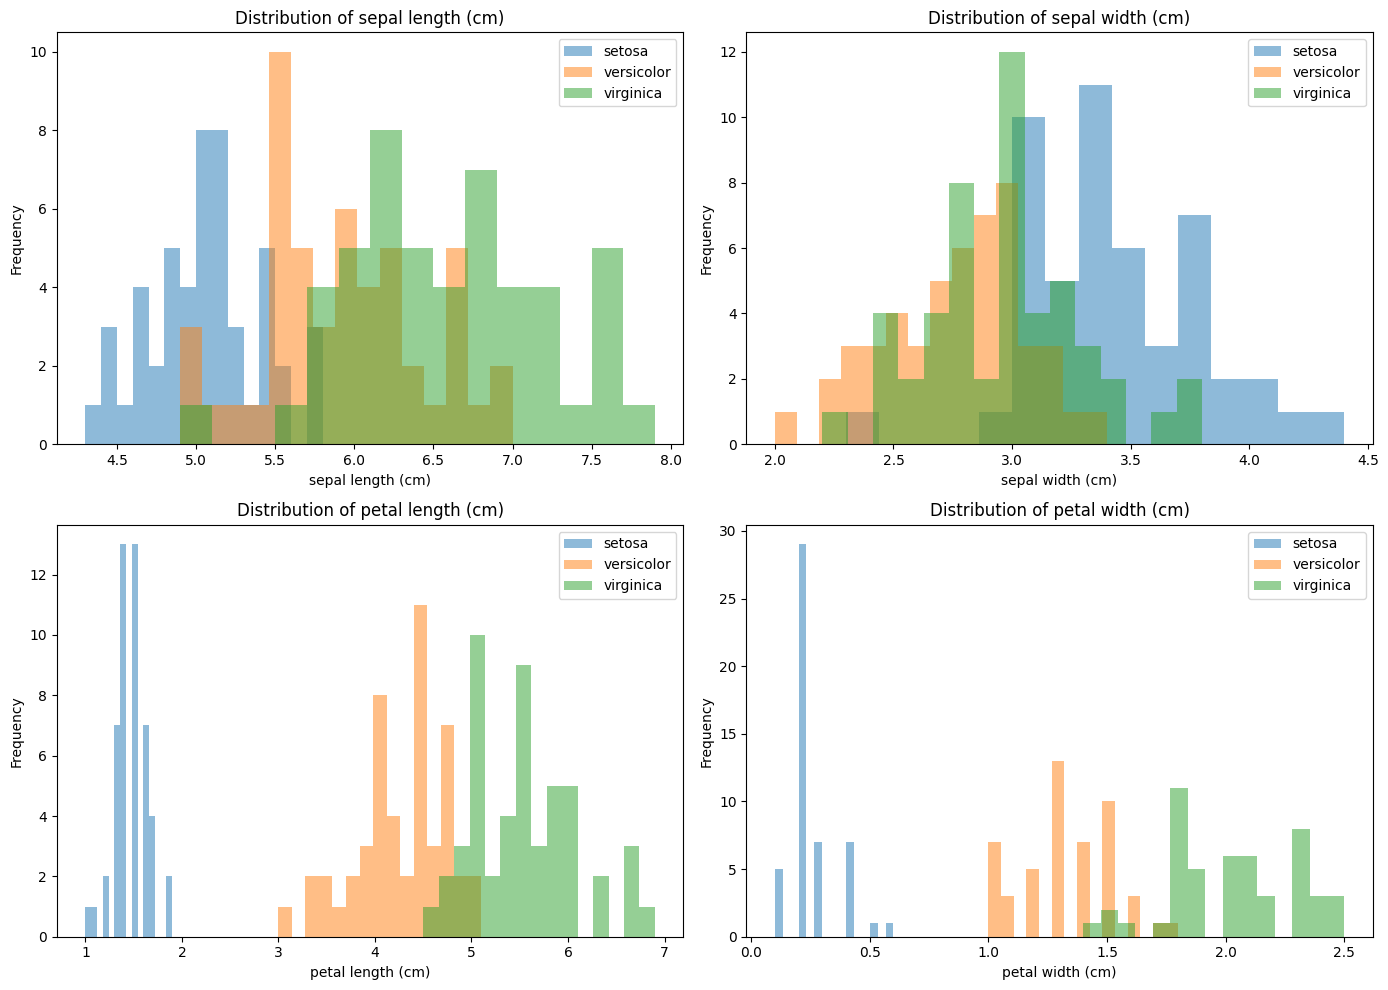

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, feature in enumerate(iris.feature_names):
    for species in range(3):
        data = df_iris[df_iris['species'] == species][feature]
        axes[i].hist(data, alpha=0.5, bins=15, label=iris.target_names[species])
    
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

Обучающая выборка: (105, 4)
Тестовая выборка: (45, 4)


In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9111


In [7]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



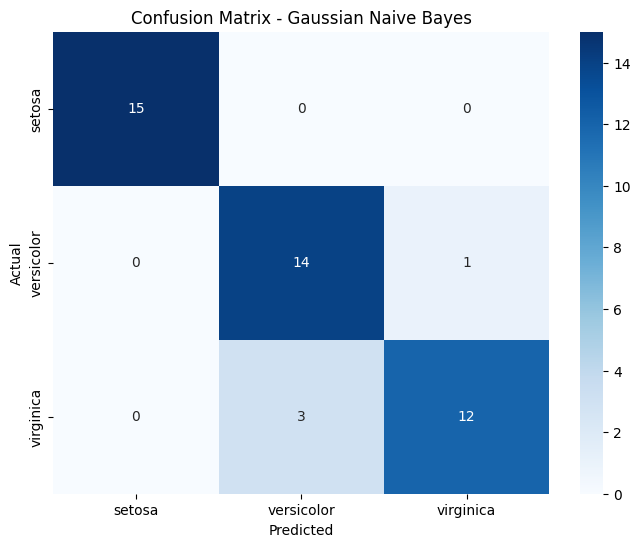

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()

## 3. Параметры модели Gaussian NB

Давайте посмотрим на параметры, которые модель выучила: среднее (μ) и стандартное отклонение (σ) для каждого признака в каждом классе.

In [10]:
print("Средние значения (μ) для каждого класса:")
print(pd.DataFrame(gnb.theta_, 
                   columns=iris.feature_names, 
                   index=iris.target_names))

print("\nДисперсии (σ²) для каждого класса:")
print(pd.DataFrame(gnb.var_, 
                   columns=iris.feature_names, 
                   index=iris.target_names))

Средние значения (μ) для каждого класса:
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
setosa               4.988571          3.425714           1.485714   
versicolor           5.948571          2.731429           4.237143   
virginica            6.682857          3.008571           5.631429   

            petal width (cm)  
setosa              0.240000  
versicolor          1.308571  
virginica           2.068571  

Дисперсии (σ²) для каждого класса:
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
setosa               0.103298          0.173910           0.022939   
versicolor           0.240784          0.085584           0.211478   
virginica            0.424849          0.117355           0.322727   

            petal width (cm)  
setosa              0.009257  
versicolor          0.035641  
virginica           0.063869  


## 4. Практика с медицинскими данными

In [11]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

print("Датасет Breast Cancer")
print(f"Форма: {X_cancer.shape}")
print(f"Классы: {cancer.target_names}")
print(f"Количество признаков: {len(cancer.feature_names)}")

Датасет Breast Cancer
Форма: (569, 30)
Классы: ['malignant' 'benign']
Количество признаков: 30


In [12]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer
)

gnb_cancer = GaussianNB()
gnb_cancer.fit(X_train_c, y_train_c)

y_pred_c = gnb_cancer.predict(X_test_c)
accuracy_c = accuracy_score(y_test_c, y_pred_c)

print(f"Accuracy: {accuracy_c:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_c, y_pred_c, target_names=cancer.target_names))

Accuracy: 0.9386

Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.90      0.92        42
      benign       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



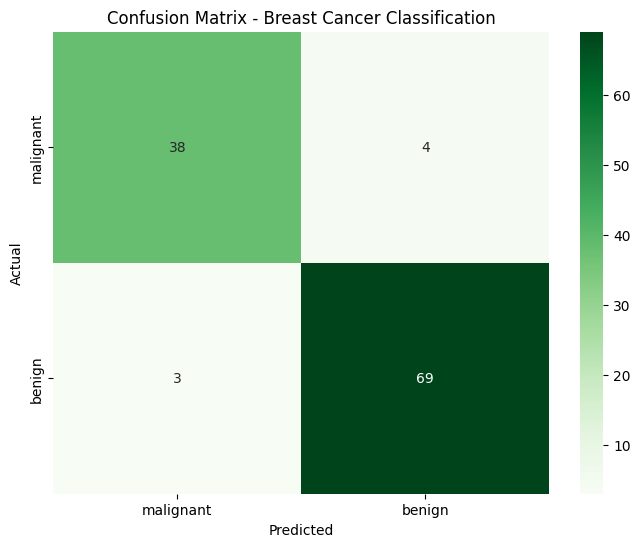

In [13]:
cm_cancer = confusion_matrix(y_test_c, y_pred_c)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_cancer, annot=True, fmt='d', cmap='Greens',
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Breast Cancer Classification')
plt.show()

## 5. Multinomial Naive Bayes - Текстовая классификация

**Применение:** классификация текстов, где признаками являются частоты слов.

**Пример:** классификация новостей по категориям.

In [15]:

texts = [
    "Python is a great programming language",
    "Machine learning is fascinating",
    "I love Python programming",
    "Data science uses Python",
    "Football is an exciting sport",
    "Basketball players are tall",
    "I enjoy watching sports",
    "Tennis is my favorite sport",
    "Deep learning requires GPUs",
    "Neural networks are powerful",
    "Soccer is popular worldwide",
    "Baseball is an American sport"
]

labels = [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]

vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(texts)

print(f"Размер словаря: {len(vectorizer.get_feature_names_out())}")
print(f"Форма матрицы признаков: {X_text.shape}")
print(f"\nСловарь (первые 20 слов): {vectorizer.get_feature_names_out()[:20]}")

Размер словаря: 37
Форма матрицы признаков: (12, 37)

Словарь (первые 20 слов): ['american' 'an' 'are' 'baseball' 'basketball' 'data' 'deep' 'enjoy'
 'exciting' 'fascinating' 'favorite' 'football' 'gpus' 'great' 'is'
 'language' 'learning' 'love' 'machine' 'my']


In [16]:
mnb = MultinomialNB(alpha=1.0) 
mnb.fit(X_text, labels)

test_texts = [
    "Python programming is fun",
    "I love playing football",
    "Machine learning with Python",
    "Sports are exciting to watch"
]

X_test_text = vectorizer.transform(test_texts)
predictions = mnb.predict(X_test_text)
probabilities = mnb.predict_proba(X_test_text)

categories = ['Programming', 'Sports']

for i, text in enumerate(test_texts):
    print(f"\nТекст: '{text}'")
    print(f"Предсказанная категория: {categories[predictions[i]]}")
    print(f"Вероятности: Programming={probabilities[i][0]:.4f}, Sports={probabilities[i][1]:.4f}")


Текст: 'Python programming is fun'
Предсказанная категория: Programming
Вероятности: Programming=0.8880, Sports=0.1120

Текст: 'I love playing football'
Предсказанная категория: Programming
Вероятности: Programming=0.5161, Sports=0.4839

Текст: 'Machine learning with Python'
Предсказанная категория: Programming
Вероятности: Programming=0.9636, Sports=0.0364

Текст: 'Sports are exciting to watch'
Предсказанная категория: Sports
Вероятности: Programming=0.2159, Sports=0.7841


## 6. Сглаживание Лапласа

Параметр `alpha` контролирует сглаживание

In [17]:
alphas = [0.01, 0.1, 0.5, 1.0, 2.0, 5.0]

print("Влияние параметра alpha на предсказания:\n")
test_text = "Python machine learning"
X_single = vectorizer.transform([test_text])

for alpha in alphas:
    mnb_temp = MultinomialNB(alpha=alpha)
    mnb_temp.fit(X_text, labels)
    prob = mnb_temp.predict_proba(X_single)[0]
    print(f"alpha={alpha:4.2f}: Programming={prob[0]:.4f}, Sports={prob[1]:.4f}")

Влияние параметра alpha на предсказания:

alpha=0.01: Programming=1.0000, Sports=0.0000
alpha=0.10: Programming=0.9999, Sports=0.0001
alpha=0.50: Programming=0.9918, Sports=0.0082
alpha=1.00: Programming=0.9636, Sports=0.0364
alpha=2.00: Programming=0.8885, Sports=0.1115
alpha=5.00: Programming=0.7345, Sports=0.2655


## 7. Работа с реальным датасетом новостей

Загрузим датасет 20 Newsgroups и классифицируем новости.

In [18]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, 
                                       remove=('headers', 'footers', 'quotes'),
                                       random_state=42)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories,
                                      remove=('headers', 'footers', 'quotes'),
                                      random_state=42)

print(f"Количество обучающих документов: {len(newsgroups_train.data)}")
print(f"Количество тестовых документов: {len(newsgroups_test.data)}")
print(f"Категории: {newsgroups_train.target_names}")

Количество обучающих документов: 2257
Количество тестовых документов: 1502
Категории: ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']


In [19]:
print("Пример документа:")
print(f"Категория: {newsgroups_train.target_names[newsgroups_train.target[0]]}")
print(f"\nТекст:\n{newsgroups_train.data[0][:500]}...")

Пример документа:
Категория: comp.graphics

Текст:
Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael....


In [20]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_news = tfidf_vectorizer.fit_transform(newsgroups_train.data)
X_test_news = tfidf_vectorizer.transform(newsgroups_test.data)

y_train_news = newsgroups_train.target
y_test_news = newsgroups_test.target

print(f"Форма обучающей матрицы: {X_train_news.shape}")
print(f"Форма тестовой матрицы: {X_test_news.shape}")

Форма обучающей матрицы: (2257, 5000)
Форма тестовой матрицы: (1502, 5000)


In [21]:
mnb_news = MultinomialNB(alpha=0.1)
mnb_news.fit(X_train_news, y_train_news)

y_pred_news = mnb_news.predict(X_test_news)

accuracy_news = accuracy_score(y_test_news, y_pred_news)
print(f"Accuracy: {accuracy_news:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_news, y_pred_news, 
                          target_names=newsgroups_test.target_names))

Accuracy: 0.8216

Classification Report:
                        precision    recall  f1-score   support

           alt.atheism       0.80      0.57      0.67       319
         comp.graphics       0.91      0.93      0.92       389
               sci.med       0.91      0.83      0.87       396
soc.religion.christian       0.70      0.91      0.79       398

              accuracy                           0.82      1502
             macro avg       0.83      0.81      0.81      1502
          weighted avg       0.83      0.82      0.82      1502



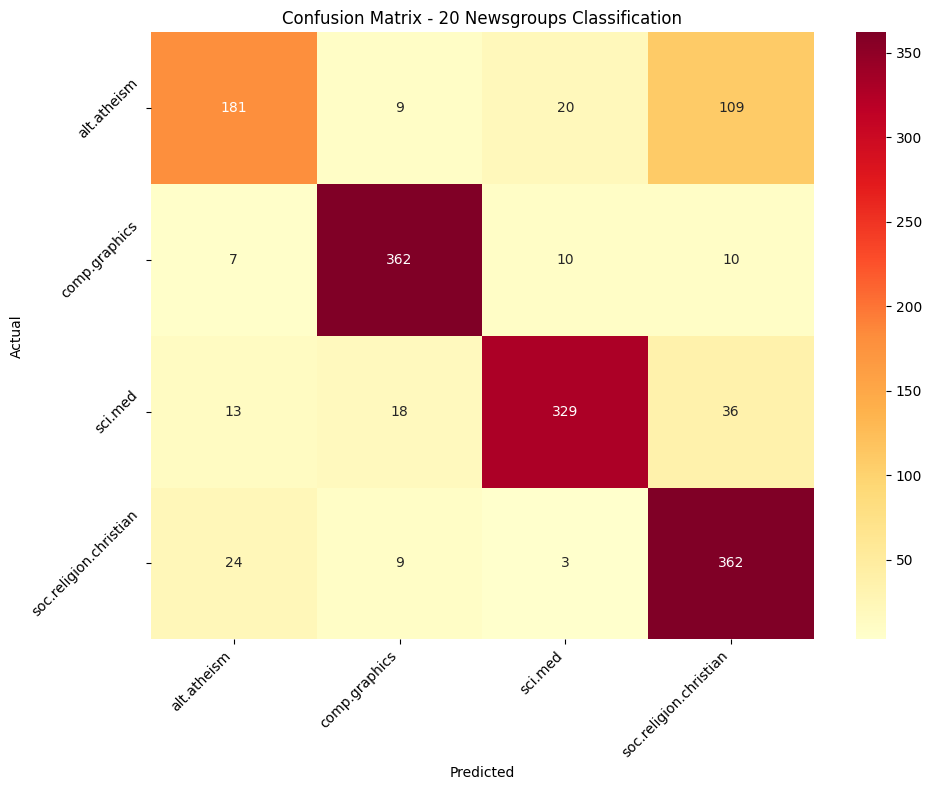

In [22]:
cm_news = confusion_matrix(y_test_news, y_pred_news)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_news, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=newsgroups_test.target_names,
            yticklabels=newsgroups_test.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - 20 Newsgroups Classification')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 8. Задания для самостоятельной работы

### Задание 1: Классификация вин
Используйте датасет Wine из sklearn и классифицируйте вина по качеству.

In [ ]:
from sklearn.datasets import load_wine

wine = load_wine()
# TODO: Разделите на train/test
# TODO: Обучите Gaussian NB
# TODO: Оцените качество модели
# TODO: Постройте confusion matrix

### Задание 2: Sentiment Analysis
Создайте классификатор для определения тональности отзывов (положительный/отрицательный).

In [ ]:
# Пример данных
reviews = [
    ("This product is amazing!", 1),
    ("Terrible quality, waste of money", 0),
    ("Best purchase ever", 1),
    ("Disappointed with this item", 0),
    # Добавьте больше примеров
]

# TODO: Векторизуйте тексты
# TODO: Обучите Multinomial NB
# TODO: Протестируйте на новых отзывах

### Задание 3: Сравнение параметров сглаживания
Исследуйте влияние параметра alpha на качество модели.

In [ ]:
# TODO: Используйте датасет на выбор
# TODO: Обучите модели с разными alpha (0.01, 0.1, 1, 10, 100)

### Задание 4: Работа с несбалансированными данными
Создайте датасет с несбалансированными классами и оцените, как Naive Bayes с этим справляется.

In [ ]:
# TODO: Используйте датасет, где один класс встречается гораздо чаще другого
# TODO: Обучите Naive Bayes
# TODO: Вычислите precision, recall, F1-score для каждого класса